In [1]:
import logging
import pickle

import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from tqdm import tqdm_notebook
from IPython.core.display import Image, display
from random import randint


from commons.config import CIMRI_CSV, DIM_RED_MODEL_PATH
from feature_extraction.image_vectorization import ImageVectorizationModel, ImageClassificationModel
from scipy import spatial
import random

2019-06-15 14:59:10,737 : INFO : Checking directories...
2019-06-15 14:59:10,737 : INFO : Directories are set.
Using TensorFlow backend.


### Get Data

In [2]:
df = pd.read_csv(CIMRI_CSV, error_bad_lines=False)
df = df.drop(columns=['Unnamed: 0'])
df = df.loc[df.isSame == 1]
df = df.drop(columns=['offerId', 'isSame', 'secondProduct'])
df = df.dropna()
fashion_categories = df.loc[df.firstProduct.str.contains(
    '(gozluk|takim|kolye|kupe|bilezik|bere|atki|sapka|pijama|corap|cizme|kemer|kulaklik|eldiven|sal|sort|mont|bandana|polar|fular|esarp|yelek|gomlek|sweatshirt|ceket|pardesu|palto|saat|ayakkabi|t-shirt|elbise|canta|bluz|pantalon|jean|etek|kolye)',
    regex=True)]
fashion_categories = fashion_categories.categoryIdOfFirst.unique()
df = df.loc[df.categoryIdOfFirst.isin(fashion_categories)]

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


### Extract visual features

In [3]:
sample_count = 1000
img_vectorizer = ImageVectorizationModel(ImageClassificationModel.vgg16)
image_vectors = []
image_list = []
for _, row in tqdm_notebook(df.head(sample_count).iterrows(), total=sample_count, desc='Vectorizing images'):
    img_ids = []
    [img_ids.append(img_id) for img_id in row['productImages'].split('-')]
    [img_ids.append(img_id) for img_id in row['offerImages'].split('-')]
    img_ids = set(img_ids)
    for img_id in img_ids:
        try:
            image_vectors.append(img_vectorizer.get_feature_vectors(img_id))
            image_list.append([row['productId'], img_id])
        except Exception:
            continue

2019-06-15 14:59:15,141 : WARNING : From /usr/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py:263: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.


2019-06-15 14:59:16,986 : ERROR : Can't get feature vector for image index 1 is out of bounds for axis 3 with size 1
2019-06-15 14:59:16,987 : ERROR : Can't get feature vector for image index 1 is out of bounds for axis 3 with size 1
2019-06-15 14:59:16,989 : ERROR : Can't get feature vector for image index 1 is out of bounds for axis 3 with size 1
2019-06-15 14:59:16,991 : ERROR : Can't get feature vector for image index 1 is out of bounds for axis 3 with size 1
2019-06-15 14:59:16,992 : ERROR : Can't get feature vector for image index 1 is out of bounds for axis 3 with size 1
2019-06-15 14:59:16,994 : ERROR : Can't get feature vector for image index 1 is out of bounds for axis 3 with size 1
2019-06-15 14:59:16,995 : ERROR : Can't get feature vector for image index 1 is out of bounds for axis 3 with size 1
2019-06-15 14:59:16,997 : ERROR : Can't get feature vector for image index 1 is out of bounds for axis 3 with size 1
2019-06-15 14:59:16,998 : ERROR : Can't get feature vector for i

2019-06-15 15:42:29,035 : ERROR : Can't get feature vector for image index 1 is out of bounds for axis 3 with size 1
2019-06-15 15:42:29,041 : ERROR : Can't get feature vector for image index 1 is out of bounds for axis 3 with size 1
2019-06-15 15:42:29,048 : ERROR : Can't get feature vector for image index 1 is out of bounds for axis 3 with size 1
2019-06-15 15:42:29,056 : ERROR : Can't get feature vector for image index 1 is out of bounds for axis 3 with size 1
2019-06-15 15:42:29,062 : ERROR : Can't get feature vector for image index 1 is out of bounds for axis 3 with size 1
2019-06-15 15:42:29,068 : ERROR : Can't get feature vector for image index 1 is out of bounds for axis 3 with size 1
2019-06-15 15:42:29,073 : ERROR : Can't get feature vector for image index 1 is out of bounds for axis 3 with size 1
2019-06-15 15:42:29,079 : ERROR : Can't get feature vector for image index 1 is out of bounds for axis 3 with size 1
2019-06-15 15:42:29,085 : ERROR : Can't get feature vector for i

2019-06-15 15:45:42,285 : ERROR : Can't get feature vector for image index 1 is out of bounds for axis 3 with size 1
2019-06-15 15:45:47,285 : ERROR : Can't get feature vector for image index 1 is out of bounds for axis 3 with size 1
2019-06-15 15:45:50,676 : ERROR : Can't get feature vector for image index 1 is out of bounds for axis 3 with size 1
2019-06-15 15:45:55,726 : ERROR : Can't get feature vector for image index 1 is out of bounds for axis 3 with size 1
2019-06-15 15:45:58,754 : ERROR : Can't get feature vector for image index 1 is out of bounds for axis 3 with size 1
2019-06-15 15:46:01,251 : ERROR : Can't get feature vector for image index 1 is out of bounds for axis 3 with size 1
2019-06-15 15:46:03,798 : ERROR : Can't get feature vector for image index 1 is out of bounds for axis 3 with size 1
2019-06-15 15:46:06,791 : ERROR : Can't get feature vector for image index 1 is out of bounds for axis 3 with size 1
2019-06-15 15:46:07,598 : ERROR : Can't get feature vector for i

2019-06-15 16:47:07,451 : ERROR : Can't get feature vector for image index 1 is out of bounds for axis 3 with size 1
2019-06-15 16:47:07,919 : ERROR : Can't get feature vector for image index 1 is out of bounds for axis 3 with size 1
2019-06-15 16:47:08,413 : ERROR : Can't get feature vector for image index 1 is out of bounds for axis 3 with size 1
2019-06-15 16:51:33,750 : ERROR : Can't get feature vector for image index 1 is out of bounds for axis 3 with size 1
2019-06-15 16:51:38,204 : ERROR : Can't get feature vector for image index 1 is out of bounds for axis 3 with size 1
2019-06-15 16:51:38,736 : ERROR : Can't get feature vector for image index 1 is out of bounds for axis 3 with size 1
2019-06-15 16:51:41,408 : ERROR : Can't get feature vector for image index 1 is out of bounds for axis 3 with size 1
2019-06-15 16:51:44,031 : ERROR : Can't get feature vector for image index 1 is out of bounds for axis 3 with size 1
2019-06-15 16:51:44,036 : ERROR : Can't get feature vector for i

### Reduce dimensionality

In [4]:
pca = PCA(n_components=2)
pca.fit(image_vectors)
X_embedded = pca.transform(image_vectors)

with open(DIM_RED_MODEL_PATH, 'wb') as pca_file:
    pickle.dump(pca, pca_file)

X_embedded = np.array(X_embedded)
image_list = np.array(image_list)
df_concatenated = np.concatenate((image_list, X_embedded), axis=1)
df_concatenated = pd.DataFrame(df_concatenated, columns=['productId', 'imageId', 'x', 'y'])

### Generate Index

In [5]:
tree = spatial.KDTree(X_embedded)

### Search

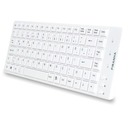

Query image


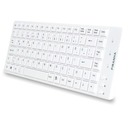

6.291413575689448e-13


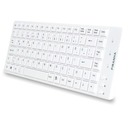

6.291413575689448e-13


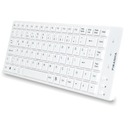

0.8074458647092967


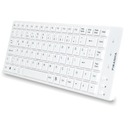

0.8074458647092967


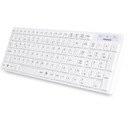

0.8580525351444175


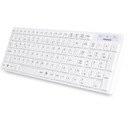

0.8580525351444175


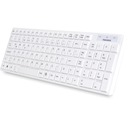

0.920057975123519


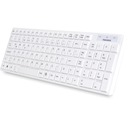

0.920057975123519


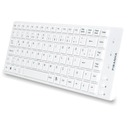

0.9310913310482544


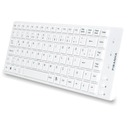

0.9310913310482544


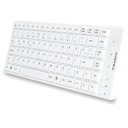

0.9520143564229175


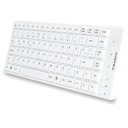

0.9520143564229175


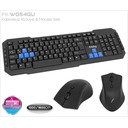

1.0429867146196632


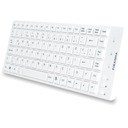

1.043798800788635


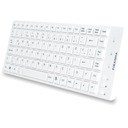

1.043798800788635


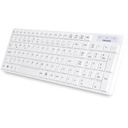

1.0532777767631238


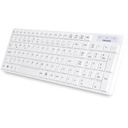

1.0532777767631238


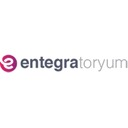

1.1864886053480423


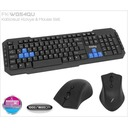

1.7707623632034863


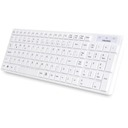

1.7990850528125562


In [15]:
image_size = 128
item_index = randint(0, len(image_vectors))

url = "https://cdn.cimri.io/image/{0}x{0}/asdf_{1}.jpg".format(image_size, image_list[item_index][1])
display(Image(url, unconfined=True))
print('Query image')
    
distances, indexes = tree.query(pca.transform([image_vectors[item_index]])[0], k=20)
for distance, index in zip(distances, indexes):
    image_id = image_list[index][1]
    url = "https://cdn.cimri.io/image/{0}x{0}/asdf_{1}.jpg".format(image_size, image_id)
    display(Image(url, unconfined=True))
    print(distance)